In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#open csv file
df = pd.read_csv("~/Desktop/Portfolio project/Portfolio-Project/merged_file.csv")
df.head()

,date,subways_total_estimated_ridership,division,train_line,wday_wnd,incident_type,incident_count
0,2020-03-01,2212965,A DIVISION,2,1,Persons on Trackbed/Police/Medical,1
1,2020-03-01,2212965,A DIVISION,2,1,Signals,1
2,2020-03-01,2212965,A DIVISION,4,1,Track,1
3,2020-03-01,2212965,A DIVISION,5,1,Persons on Trackbed/Police/Medical,1
4,2020-03-01,2212965,A DIVISION,6,1,Persons on Trackbed/Police/Medical,1


In [22]:
df.groupby("incident_type")["subways_total_estimated_ridership"].agg(["mean","count"])

,mean,count
incident_type,,
Other,2.446503e+06,180
Persons on Trackbed/Police/Medical,2.605555e+06,575
Signals,2.568742e+06,518
Stations and Structure,2.725469e+06,168
Subway Car,2.590913e+06,209
Track,2.795903e+06,308


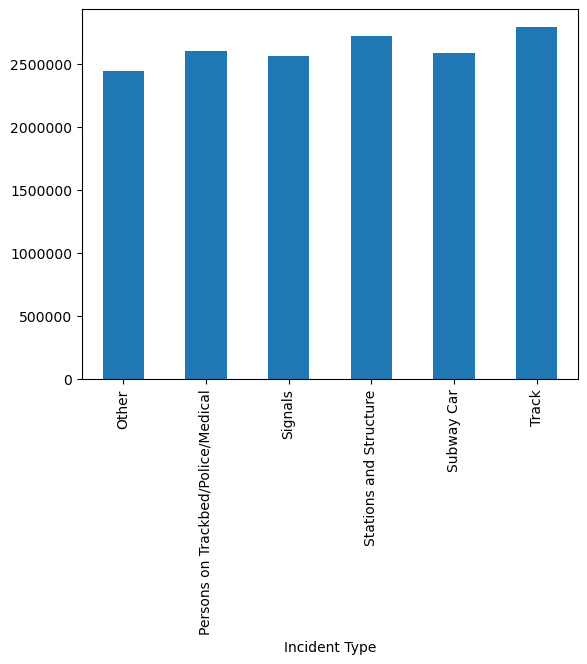

In [ ]:
from matplotlib.ticker import FuncFormatter
#grouping and preparing data
incident_ridership = df.groupby("incident_type")["subways_total_estimated_ridership"].mean()
incident_ridership = incident_ridership.round(2)
incident_ridership = incident_ridership.reset_index()
incident_ridership.columns = ['Incident Type', 'Ridership Mean']
#create a bar plot and formatting
ax = incident_ridership.plot.bar(x='Incident Type', y='Ridership Mean', legend=False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

So, what I wanted to explore with this graph is the average number of ridership when compared to the number of times an incident occurred. When there is a track incident, the ridership seems to be at its highest. This can be caused by many factors. It could be that when there are track issues, it just so happens to be a busier day. However, the number of ridership across all incidents doesn't seem to have a significant effect on ridership. This means that most riders aren't affected or easily deterred when it comes to these issues happening. We also see less ridership when 'other' incidents occur, which can maybe be related to those incidents occurring less commonly. This graph helps illustrate that, on average, incidents don't tend to affect ridership too much. This can mostly be attributed to people having places to be, and minor inconveniences don't change transportation plans too much.

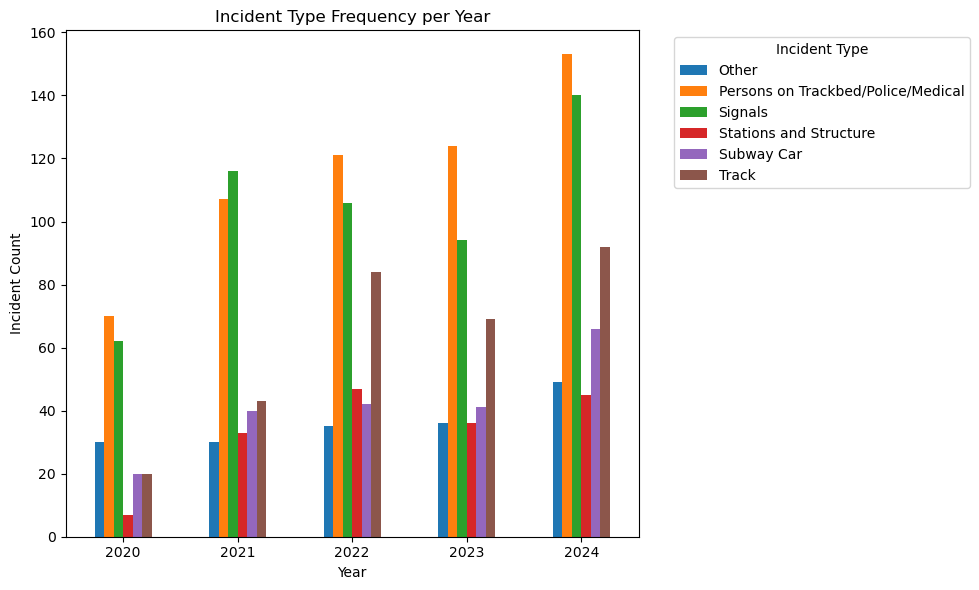

In [ ]:
df['date'] = pd.to_datetime(df['date'])
#extract the year from the 'date' column
df['year'] = df['date'].dt.year
#group and count the occurrences
incident_count_per_year = df.groupby(['incident_type', 'year']).size().reset_index(name='incident_count')
#pivot the data
incident_count_pivot = incident_count_per_year.pivot(index='year', columns='incident_type', values='incident_count')
#plot the data and format
ax = incident_count_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title("Incident Type Frequency per Year")
plt.ylabel("Incident Count")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This graph allows us to see the number of times an incident occurs in a year. When we take a closer look, we can see that in every year except 2021, the most commonly occurring incident is Persons on Trackbed/Police/Medical. This could be the case because there are three subcategories within this group. Any medical emergency or incident requiring the police tends to happen more commonly, especially in heavily populated areas or places with a lot of foot traffic. In 2021, however, there seems to be more incidents related to signals. This could be related to the fact that after lower ridership in 2020 due to the pandemic, more electrical issues arose that needed to be fixed, causing problems with displays and other signal types. In third place, track issues are more common, occurring after the other two incidents. Every year, there is a gradual increase in the number of incidents. This can also be attributed to the growing importance of tracking these incidents more carefully, or it could simply be that, as stations get older, more incidents occur.

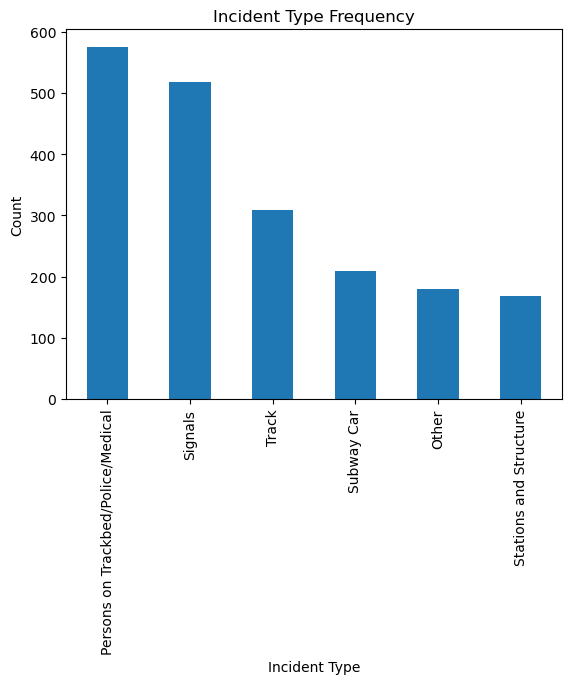

In [ ]:
#
incident_counts = df['incident_type'].value_counts()
incident_counts.plot(kind='bar')
plt.title('Incident Type Frequency')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.show()

Other: 180
Persons on Trackbed/Police/Medical: 575
Signals: 518
Stations and Structure: 168
Subway Car: 209
Track: 308
Persons on Trackbed/Police/Medical occurs most often, as I stated earlier. This could be related to it having more incident types, while the others tend to be single categories. In any situation where there are many people, medical issues can always arise, which can lead to the presence of police. The same applies to incidents involving persons on the trackbed; police officers must be present when such an incident occurs, which may explain why this is the most common occurrence. After this, signal incidents come next. This is again attributed to the fact that as subway stations get older, more upkeep is needed for technical systems such as signals and subway cars. Over time, issues related to track and structure will likely continue to occur.

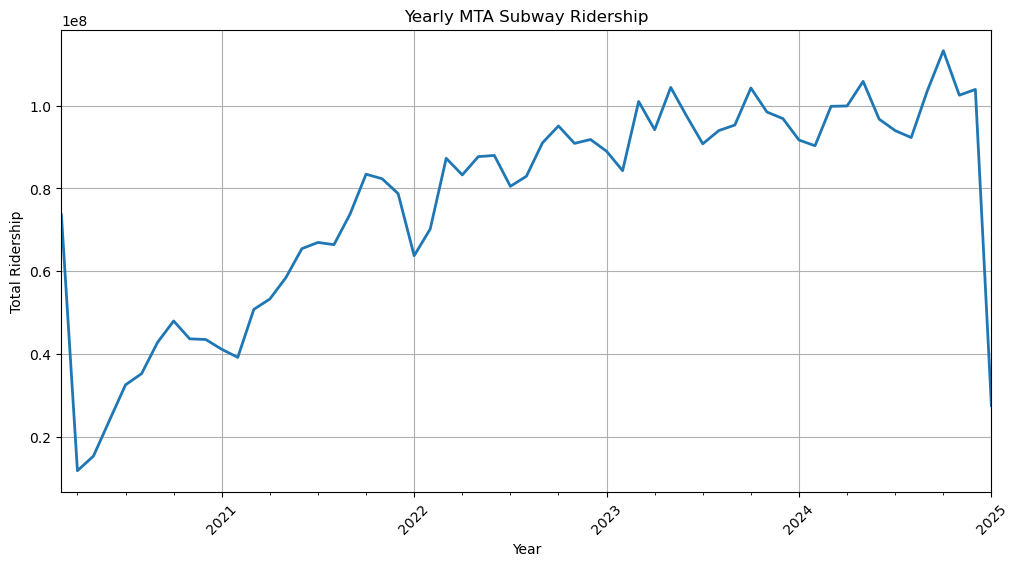

In [ ]:
# Read the CSV and directly convert 'date' to datetime while setting as index
df = pd.read_csv("~/Desktop/Portfolio project/Portfolio-Project/combined_df.csv", parse_dates=['date'], index_col='date')
yearly_ridership = df['subways_total_estimated_ridership'].resample('ME').sum()
# Plot the ridership over the years
yearly_ridership.plot(figsize=(12, 6), color='tab:blue', lw=2, title='Yearly MTA Subway Ridership', xlabel='Year', ylabel='Total Ridership')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

When we look at this graph and compare ridership through the years there are some thungs that stivk out. There is a huge drop in 2020. We can relate this to the pamdemic hat occured during this time when social distancing and regulations were put in place when it cam e to places that had many poeple in attendance. As thhe years pass there continues to be a gruadual incraese in ridership as these regulations lift. in 2021 the increase in gradual, only increasing slightly as the times still seemed uncertain. at the end of 2021 and begginign of 2022 there seems to be a drop, which could pertain the weather conditions and snowfall. Then from 2022 to end of 2024, the pattern seems to remain, relativly the same while still having some spikes and drops. It seems that a pattern seems to be forming and if things continue how they look, ridership will continue to go up and this could be due to the number of people moving to New York and the need for public transportaion in that city.